In [160]:
import numpy as np
import matplotlib.pyplot as plt
import keras

In [161]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [162]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


[9]


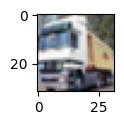

In [163]:
plt.figure(figsize=(1, 1))
plt.imshow(X_train[1])
print(y_train[1])
plt.show()

## Flatten input image to 1D

In [164]:
def flatten(X, pix):
    return X.reshape(X.shape[0], pix).astype('float32')

pix = 1
for i in range(1, len(X_train.shape)):
    pix *= X_train.shape[i]
print("Number of pixels:", pix)

X_train = flatten(X_train, pix)
X_test = flatten(X_test, pix)

Number of pixels: 3072


## Normalize the image pixel values

In [165]:
X_train /= 255
X_test /= 255

## One-Hot Encode

In [166]:
n_classes = np.unique(y_train).shape[0]
print("No. of classes:", n_classes)
print("Shape before one-hot encoding:", y_train.shape)
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding:", y_train.shape)

No. of classes: 10
Shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding: (50000, 10)


In [167]:
print(y_train[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Model

In [168]:
from keras import Sequential
from keras.layers import Input, Dense

model = Sequential([
    Input(shape=(pix,)),
    Dense(384, activation='relu'),
    Dense(96, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 384)            │     1,180,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 96)             │        36,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,223,850 (4.67 MB)

 Trainable params: 1,223,850 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

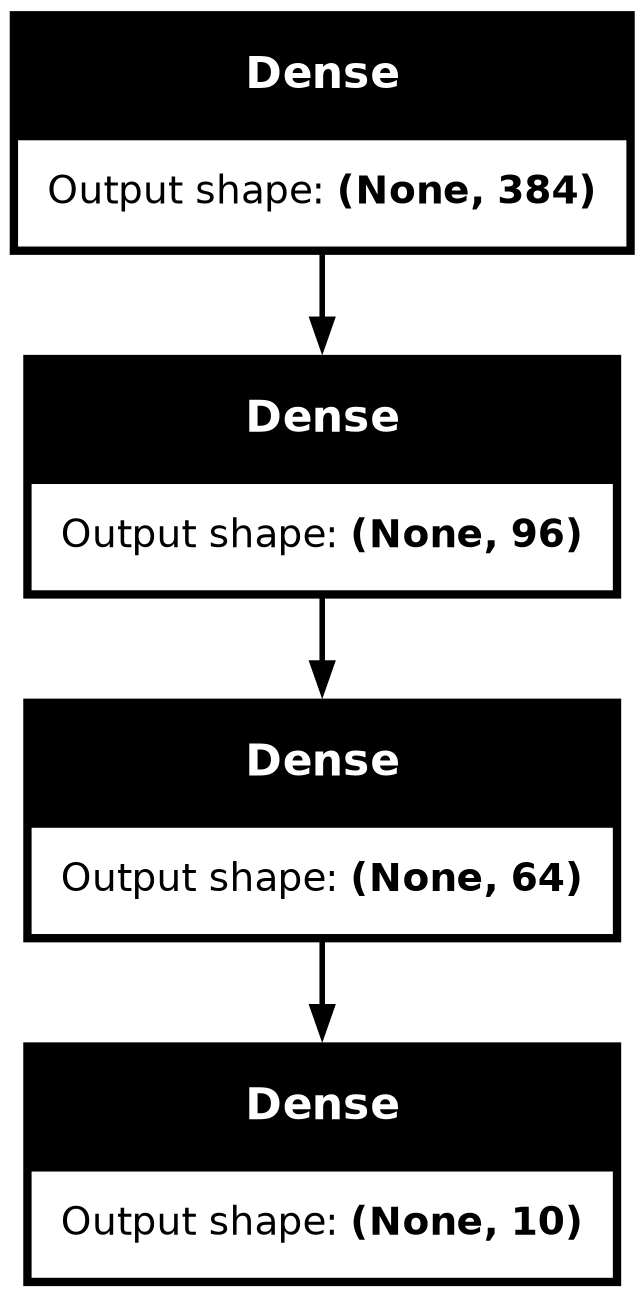

In [169]:
keras.utils.plot_model(model, show_shapes=True)

In [170]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [171]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=400, epochs=30)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2158 - loss: 2.1424 - val_accuracy: 0.3387 - val_loss: 1.8458
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3498 - loss: 1.8048 - val_accuracy: 0.3815 - val_loss: 1.7189
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3859 - loss: 1.7127 - val_accuracy: 0.4198 - val_loss: 1.6294
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4181 - loss: 1.6286 - val_accuracy: 0.4339 - val_loss: 1.5965
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4305 - loss: 1.6006 - val_accuracy: 0.4529 - val_loss: 1.5682
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4507 - loss: 1.5457 - val_accuracy: 0.4564 - val_loss: 1.5335
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4619 - loss: 1.5068 - val_accuracy: 0.4575 - val_loss: 1.5359
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4676 - loss: 1.4926 - val_accuracy: 0

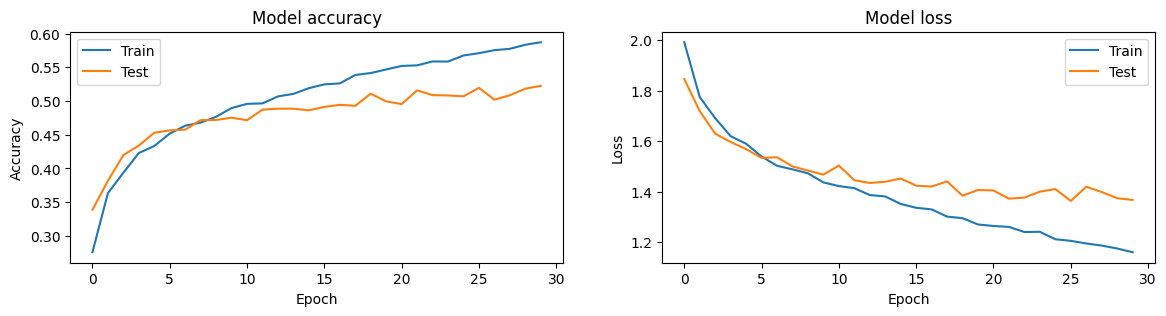

In [172]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

In [173]:
test_loss_digit, test_acc_digit = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5246 - loss: 1.3609


In [174]:
print("Testing Accuracy : ", round(test_acc_digit*100,4), "%")

Testing Accuracy :  52.25 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


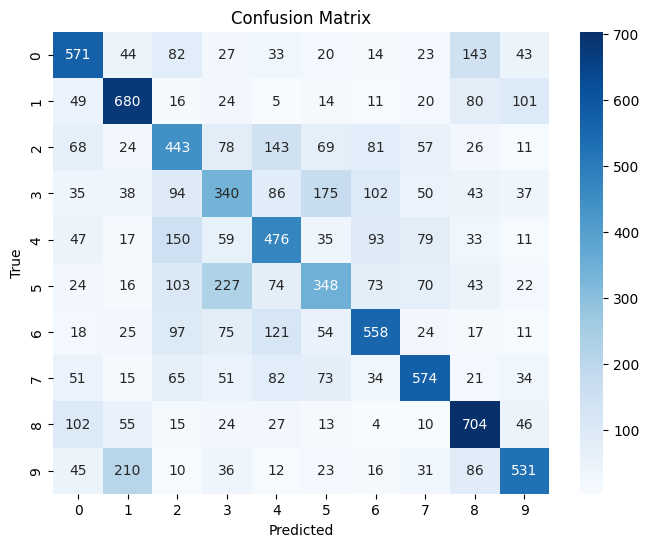

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

# Convert the predictions and true labels to classes (assuming one-hot encoding for true labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Random number is  3668


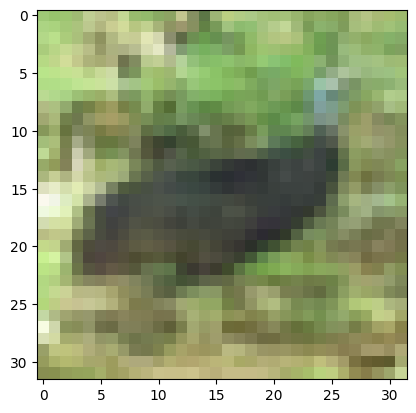

Actual class is  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class is  2


In [177]:
import random
i = random.randint(1, X_test.shape[0])
print("Random number is ", i)
plt.imshow(X_test[i].reshape(32,32,3))
plt.show()
print("Actual class is ", y_test[i].argmax())
print("Predicted class is ", model.predict(X_test[i].reshape(1,pix)).argmax())